In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime as dt
from sklearn import metrics
import seaborn as sns
#import pandas_profiling
from scipy import stats

from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, auc,mean_absolute_error,mean_squared_error, r2_score


In [3]:
sales=pd.read_csv(r'C:\Users\ruaru\Desktop\CAPSTONE\retail sales\Dataset\sales_data_set.csv',parse_dates=['Date'])
features=pd.read_csv(r'C:\Users\ruaru\Desktop\CAPSTONE\retail sales\Dataset\Features_data_set.csv',parse_dates=['Date'])
stores=pd.read_csv(r'C:\Users\ruaru\Desktop\CAPSTONE\retail sales\Dataset\stores_data_set.csv')

In [21]:
sales.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True


In [23]:
features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [25]:
stores.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [5]:
sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [7]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [9]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [11]:
features["CPI"].fillna(features["CPI"].median())
features["Unemployment"].fillna(features["Unemployment"].median())

0       8.106
1       8.106
2       8.106
3       8.106
4       8.106
        ...  
8185    7.806
8186    7.806
8187    7.806
8188    7.806
8189    7.806
Name: Unemployment, Length: 8190, dtype: float64

In [13]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0)

### MERGING DATASET

In [17]:
data = pd.merge(sales,stores,on='Store',how='left')

In [27]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [29]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [31]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   Type          421570 non-null  object 
 5   Size          421570 non-null  int64  
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     150681 non-null  float64
 9   MarkDown2     111248 non-null  float64
 10  MarkDown3     137091 non-null  float64
 11  MarkDown4     134967 non-null  float64
 12  MarkDown5     151432 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [33]:
# convert the date column into a datetime object
data['Date'] = pd.to_datetime(data['Date'],format='%d/%m/%Y')

In [37]:
y=[]
m=[]
d=[]
for dt in data['Date']:
    y.append(dt.year)
    m.append(dt.month)
    d.append(dt.day)

In [39]:
data['Year'] = pd.Series(y)
data['Month'] = pd.Series(m)
data['Day'] = pd.Series(d)

In [41]:
data.drop('Date',axis=1,inplace=True)

In [43]:
data.head(3)

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Day
0,1,1,24924.50,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2010,2,5
1,1,1,46039.49,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,2010,2,12
2,1,1,41595.55,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,2010,2,19


### Finding Null Percentage

In [46]:
null_data = (data.isnull().mean()*100).round(2)

In [48]:
null_data.index

Index(['Store', 'Dept', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Month',
       'Day'],
      dtype='object')

In [50]:
pd.DataFrame({
    "column_name": null_data.index,
    "Null Perc":null_data.values
}).sort_values("Null Perc",ascending=False)

,column_name,Null Perc
8,MarkDown2,73.61
10,MarkDown4,67.98
9,MarkDown3,67.48
7,MarkDown1,64.26
11,MarkDown5,64.08
16,Month,0.00
15,Year,0.00
14,IsHoliday,0.00
13,Unemployment,0.00
12,CPI,0.00


### NUMBER OF "0" AVAILABILITY -SPACITY

In [53]:
col_with_zero = []
for i in data.columns:
    perc_zero = (data[i]==0).mean()*100
    col_with_zero.append((i,perc_zero))

zero_percent = pd.DataFrame(col_with_zero,columns=['column_name','zero_percentage']).sort_values("zero_percentage",ascending=False)
zero_percent

,column_name,zero_percentage
14,IsHoliday,92.964158
8,MarkDown2,0.360083
9,MarkDown3,0.076856
2,Weekly_Sales,0.017316
10,MarkDown4,0.000000
16,Month,0.000000
15,Year,0.000000
13,Unemployment,0.000000
12,CPI,0.000000
11,MarkDown5,0.000000


### FEATURE DISTRIBUTION

In [56]:
import seaborn as sns

def plot_cat(column_name):
    data_1 = data[column_name].value_counts()
    print(data_1)
    color = sns.color_palette("husl",len(data_1))
    plt.figure(figsize=(16,8))
    data_1.plot(kind="bar",color=color)
    plt.show()

### SPLITING NUMERICAL AND CATEGORICAL COLUMN

In [59]:
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object', 'O','bool']]

In [61]:
data_num=data[numeric_var_names]
data_cat=data[cat_var_names]


### REPLACE NEGATIVE AND 0 MISSING

In [64]:
# Replace negative and 0 as missing
pd.set_option('mode.chained_assignment', None) # For SettingWithCopyWarning
data_num[data_num<=0]=np.NaN

In [66]:
data_num.isna().sum()

Store                0
Dept                 0
Weekly_Sales      1358
Size                 0
Temperature         69
Fuel_Price           0
MarkDown1       270889
MarkDown2       311840
MarkDown3       284803
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Year                 0
Month                0
Day                  0
dtype: int64

In [68]:
data_cat[data_cat['Type']=='B']

,Type,IsHoliday
20482,B,False
20483,B,True
20484,B,False
20485,B,False
20486,B,False
...,...,...
421565,B,False
421566,B,False
421567,B,False
421568,B,False


## DATA AUDIT REPORT

#### FOR NUMERIC COLUMN

In [76]:
# Creating Data audit Report
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()],
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

data_num.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,421570.0,0.0,9.359084e+06,22.200546,22.00000,12.785297,1.634638e+02,0.575900,1.000,1.000000,3.000000,5.000000,11.000000,22.00000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,421570.0,0.0,1.865882e+07,44.260317,37.00000,30.492054,9.297654e+02,0.688925,1.000,1.000000,4.000000,7.000000,18.000000,37.00000,74.000000,92.000000,95.000000,98.000000,99.000000
Weekly_Sales,420212.0,1358.0,6.737307e+09,16033.114591,7661.70000,22729.492116,5.166298e+08,1.417659,0.010,7.440000,67.551000,311.186000,2120.130000,7661.70000,20271.265000,42922.748000,61275.522000,106566.351400,693099.360000
Size,421570.0,0.0,5.764039e+10,136727.915739,140167.00000,60980.583328,3.718632e+09,0.446000,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,421501.0,69.0,2.533231e+07,60.100233,62.09000,18.432294,3.397495e+02,0.306693,5.540,18.360000,27.310000,33.990000,46.700000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,0.136421,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,150681.0,270889.0,1.091898e+09,7246.420196,5347.45000,8291.221345,6.874435e+07,1.144182,0.270,17.760000,149.190000,375.200000,2240.270000,5347.45000,9210.900000,15282.470000,21801.350000,41524.030000,88646.760000
MarkDown2,109730.0,311840.0,3.710112e+08,3381.128457,203.26000,9532.362243,9.086593e+07,2.819284,0.020,0.300000,3.000000,7.910000,44.200000,203.26000,1991.380000,8716.860000,16590.750000,50366.600000,104519.540000
MarkDown3,136767.0,284803.0,1.973339e+08,1442.847588,24.73000,9634.212338,9.281805e+07,6.677221,0.010,0.150000,0.700000,1.710000,5.160000,24.73000,104.140000,400.090000,1059.900000,63143.290000,141630.610000
MarkDown4,134967.0,286603.0,4.566161e+08,3383.168256,1481.31000,6292.384031,3.959410e+07,1.859909,0.220,3.970000,28.760000,108.710000,504.220000,1481.31000,3595.040000,7871.420000,12645.960000,35785.260000,67474.850000


In [78]:
num_summary=data_num.apply(var_summary).T
num_summary.to_csv('num_summary.csv')

#### FOR CATEGORICAL COLUMN

In [81]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()],
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=data_cat.apply(cat_summary)

### HANDLING OUTLIERS

#### BEFORE TREATING OUTLIERS

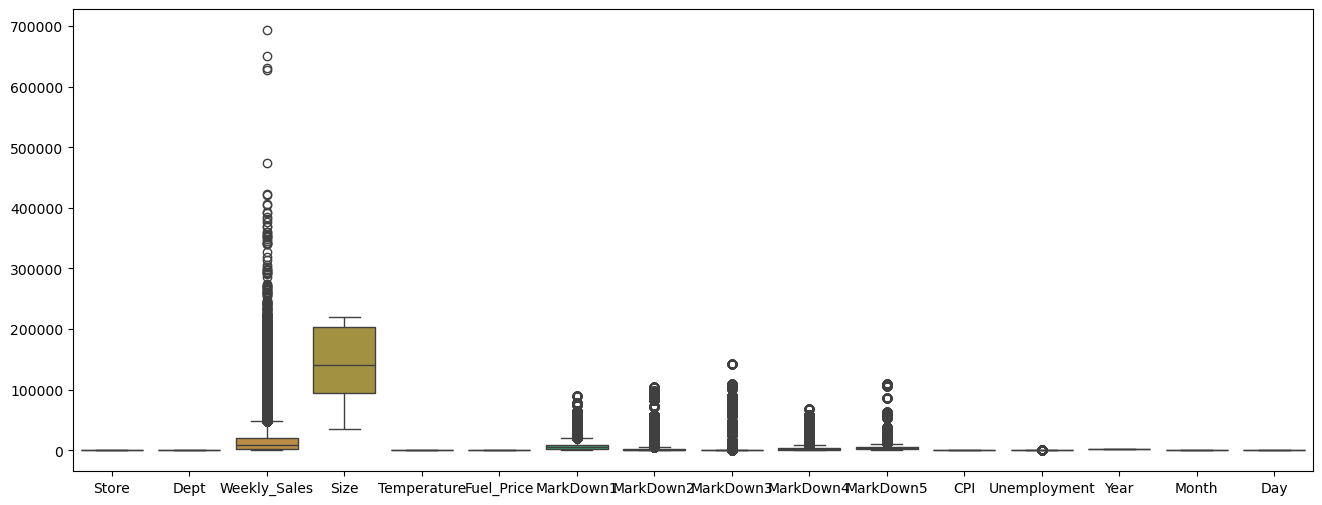

In [85]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data_num)
plt.show()

#### IQR - INVERSE TRANSITION METHOD

In [88]:
def inv_trans(x):
    return 1/x

data_4 = data_num.copy()
data_4['Weekly_Sales'] = data_4['Weekly_Sales'].apply(inv_trans)
data_4['MarkDown1']=data_4['MarkDown1'].apply(inv_trans)
data_4['MarkDown2']=data_4['MarkDown2'].apply(inv_trans)
data_4['MarkDown3']=data_4['MarkDown3'].apply(inv_trans)
data_4['MarkDown4']=data_4['MarkDown4'].apply(inv_trans)
data_4['MarkDown5']=data_4['MarkDown5'].apply(inv_trans)

In [90]:
data_4.Weekly_Sales

0         0.000040
1         0.000022
2         0.000024
3         0.000052
4         0.000046
            ...   
421565    0.001967
421566    0.001592
421567    0.000942
421568    0.001316
421569    0.000929
Name: Weekly_Sales, Length: 421570, dtype: float64

#### AFTER TREATING OUTLIERS

In [93]:
data_4.MarkDown1

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
421565    0.000219
421566    0.000198
421567    0.000511
421568    0.000499
421569    0.000249
Name: MarkDown1, Length: 421570, dtype: float64

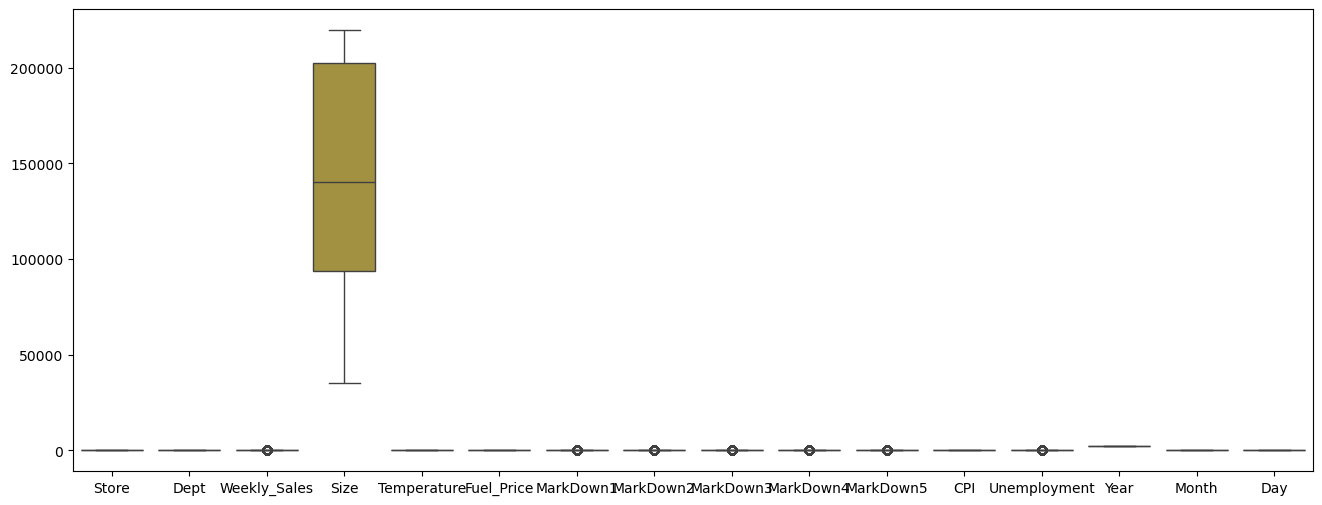

In [95]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data_4)
plt.show()

In [97]:
data_num.isna().sum()

Store                0
Dept                 0
Weekly_Sales      1358
Size                 0
Temperature         69
Fuel_Price           0
MarkDown1       270889
MarkDown2       311840
MarkDown3       284803
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Year                 0
Month                0
Day                  0
dtype: int64

### HANDLING MISSING VALUES

In [100]:
#Handling missings
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

data_num=data_num.apply(Missing_imputation)

In [102]:
data_num.isna().sum()

Store           0
Dept            0
Weekly_Sales    0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
dtype: int64

### ENCODING

In [105]:
from sklearn.preprocessing import LabelEncoder

encode=LabelEncoder()

data_cat["IsHoliday"] = encode.fit_transform(data_cat[["IsHoliday"]])
data_cat["Type"] = encode.fit_transform(data_cat[["Type"]])


data_cat.head()

C:\Users\ruaru\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ruaru\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Type,IsHoliday
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


### FINAL FILE

In [110]:
data = pd.concat([data_num, data_cat], axis=1)
data.head(3)

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Type,IsHoliday
0,1,1,24924.50,151315,42.31,2.572,5347.45,203.26,24.73,1481.31,3359.45,211.096358,8.106,2010,2,5,0,0
1,1,1,46039.49,151315,38.51,2.548,5347.45,203.26,24.73,1481.31,3359.45,211.242170,8.106,2010,2,12,0,1
2,1,1,41595.55,151315,39.93,2.514,5347.45,203.26,24.73,1481.31,3359.45,211.289143,8.106,2010,2,19,0,0


### CHECKING CORRELATION

In [113]:
# correlation matrix (ranges from 1 to -1)
corrm=data.corr()
corrm.to_csv('corrm.csv')
corrm

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Type,IsHoliday
Store,1.000000,0.024004,-0.085116,-0.182881,-0.050821,0.065290,-0.070700,-0.032979,-0.020290,-0.027762,-0.015393,-0.211088,0.208552,0.002997,0.001011,-0.000015,0.226410,-0.000548
Dept,0.024004,1.000000,0.148330,-0.002966,0.004440,0.003572,-0.000587,0.000561,0.001468,0.002169,0.000896,-0.007477,0.007837,0.003738,0.000904,-0.000678,0.003708,0.000916
Weekly_Sales,-0.085116,0.148330,1.000000,0.243852,-0.002519,-0.000021,0.052740,0.020414,0.038500,0.033798,0.055720,-0.021026,-0.025823,-0.010060,0.028391,-0.006221,-0.182142,0.012800
Size,-0.182881,-0.002966,0.243852,1.000000,-0.058984,0.003361,0.203202,0.077045,0.033536,0.112056,0.179588,-0.003314,-0.068238,-0.004975,-0.001210,-0.000386,-0.811593,0.000593
Temperature,-0.050821,0.004440,-0.002519,-0.058984,1.000000,0.143558,-0.025244,-0.179300,-0.056064,-0.044824,-0.011973,0.182580,0.097082,0.065898,0.235421,0.026098,0.043372,-0.156250
Fuel_Price,0.065290,0.003572,-0.000021,0.003361,0.143558,1.000000,0.110255,0.023561,0.017681,0.092716,0.033922,-0.164210,-0.033853,0.779633,-0.040876,0.028058,0.029687,-0.078281
MarkDown1,-0.070700,-0.000587,0.052740,0.203202,-0.025244,0.110255,1.000000,0.088153,-0.075526,0.816148,0.186165,-0.021389,-0.012874,0.185703,-0.108817,-0.165252,-0.151113,-0.017418
MarkDown2,-0.032979,0.000561,0.020414,0.077045,-0.179300,0.023561,0.088153,1.000000,-0.008790,0.068822,0.046869,-0.004593,-0.038552,0.121419,-0.018427,0.051002,-0.053992,0.207675
MarkDown3,-0.020290,0.001468,0.038500,0.033536,-0.056064,0.017681,-0.075526,-0.008790,1.000000,-0.035484,-0.001378,-0.005973,-0.017654,0.005220,0.116010,0.072234,-0.023966,0.266463
MarkDown4,-0.027762,0.002169,0.033798,0.112056,-0.044824,0.092716,0.816148,0.068822,-0.035484,1.000000,0.155688,-0.013369,-0.040124,0.213926,-0.112367,-0.166197,-0.075250,0.006756


<Axes: >

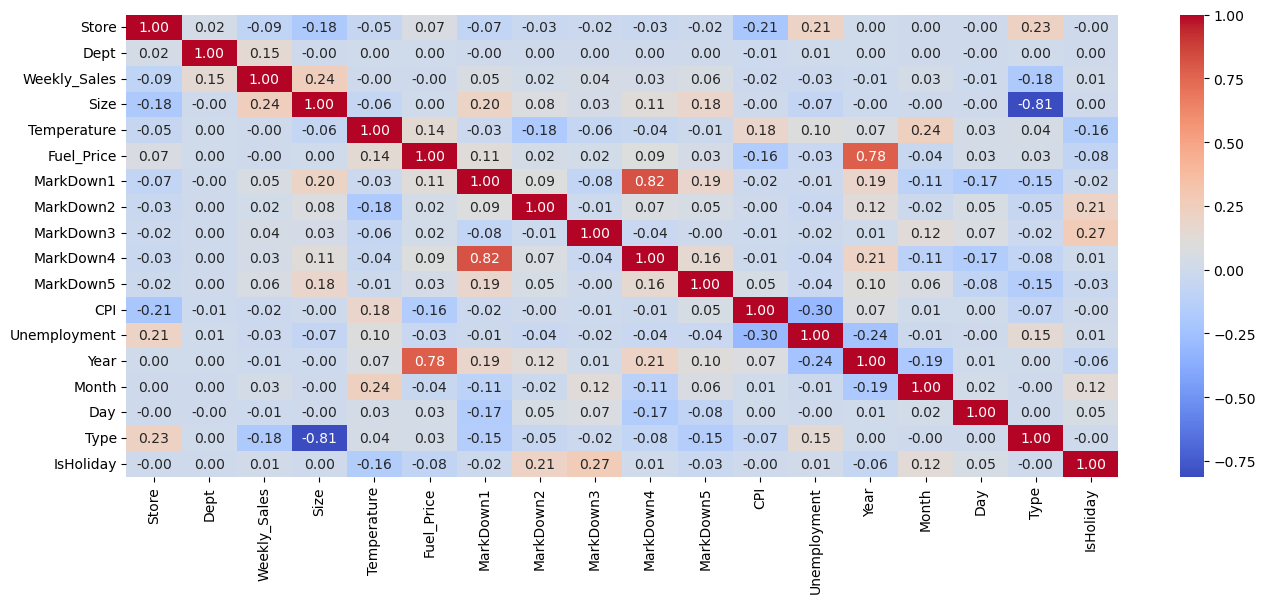

In [115]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="coolwarm",fmt=".2f")

In [118]:
data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Year', 'Month', 'Day', 'Type', 'IsHoliday'],
      dtype='object')

### CHECKING NORMALITY

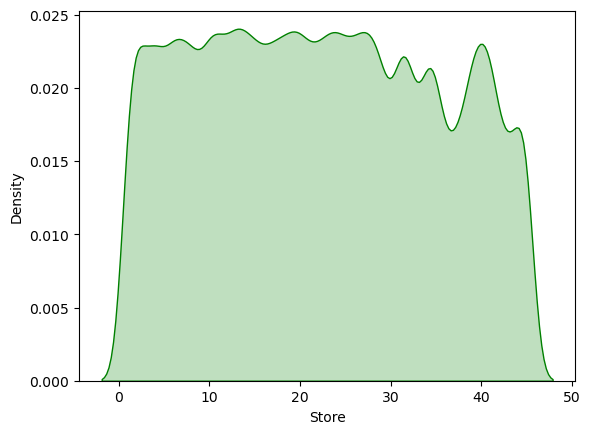

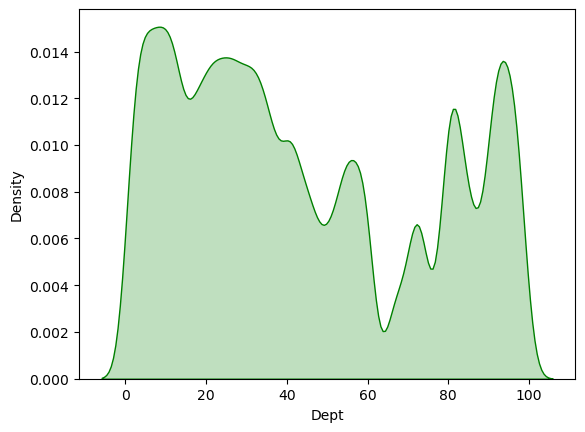

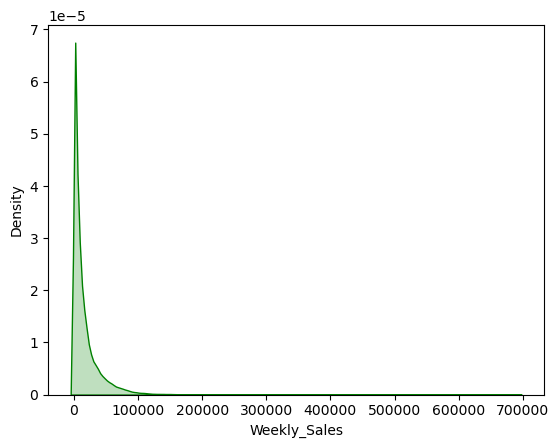

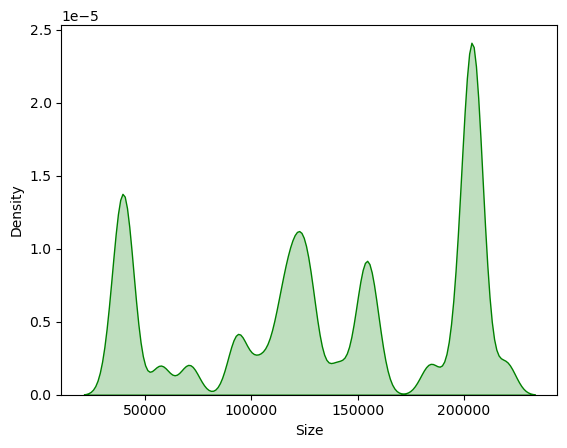

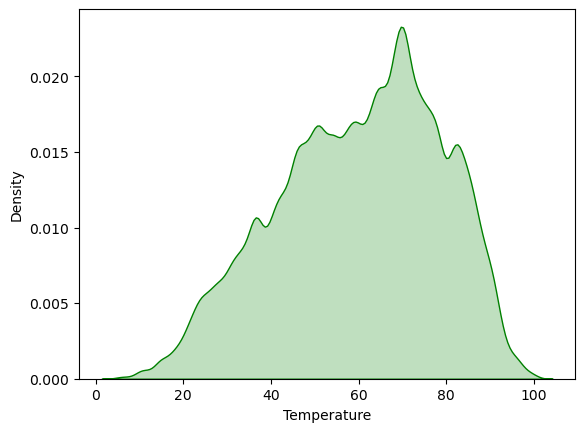

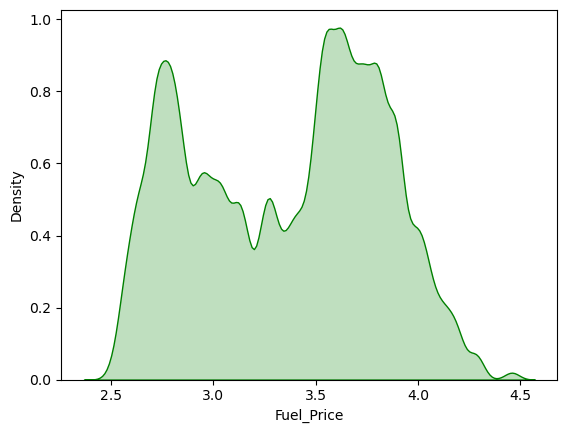

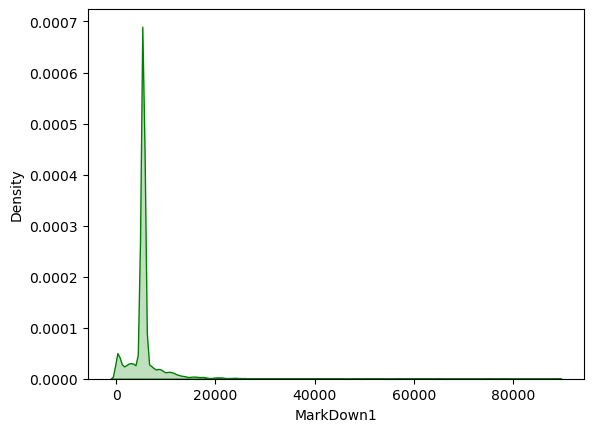

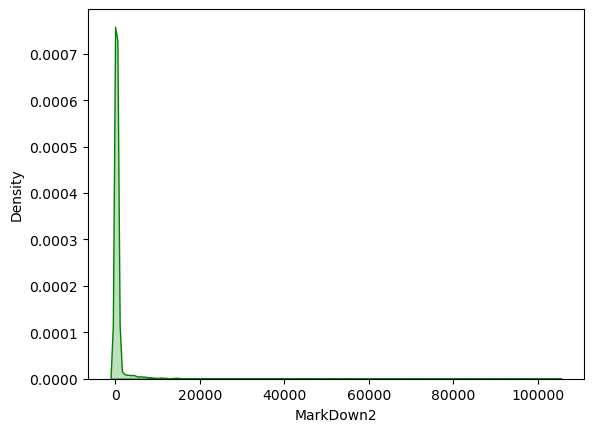

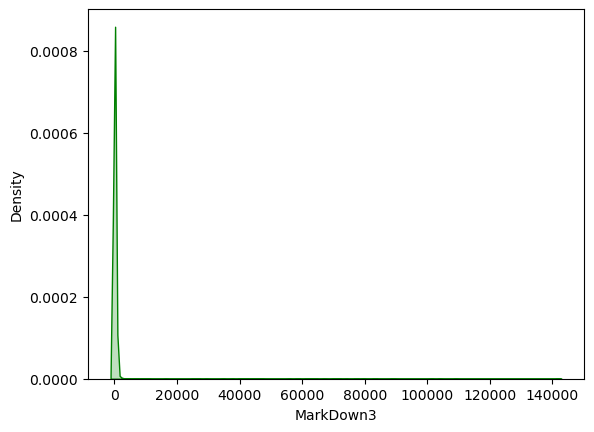

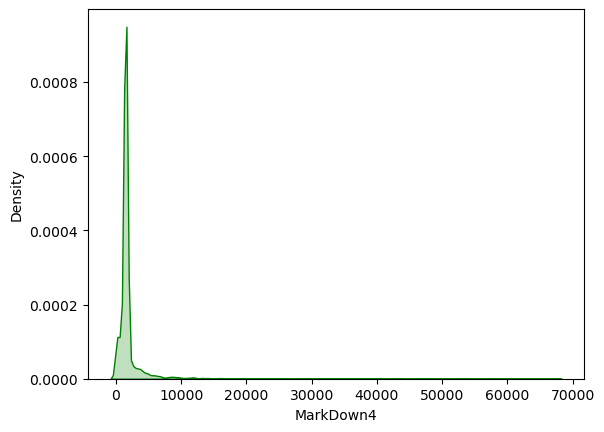

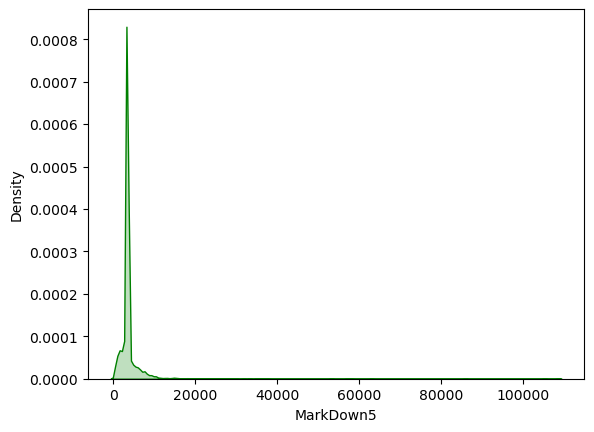

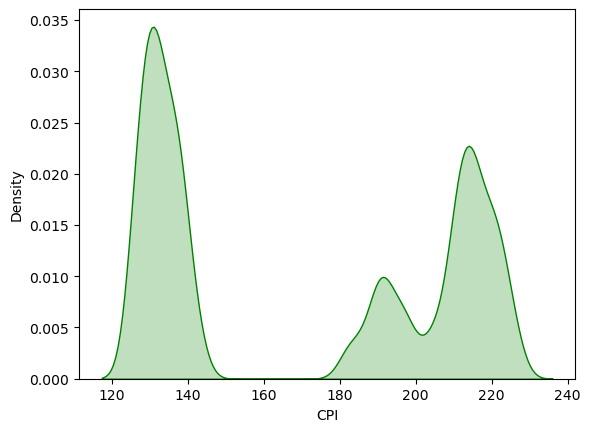

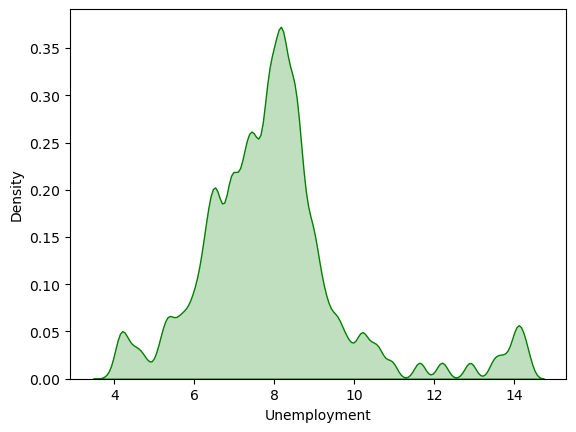

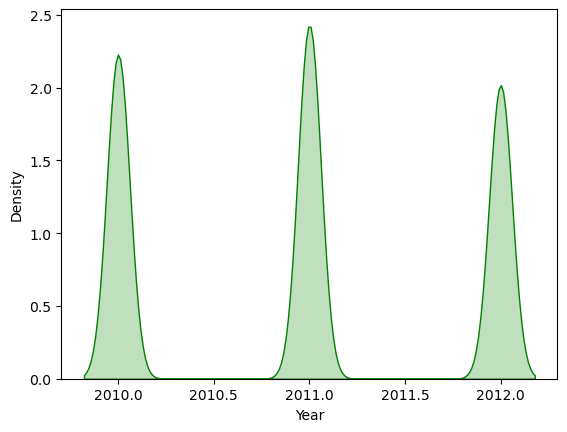

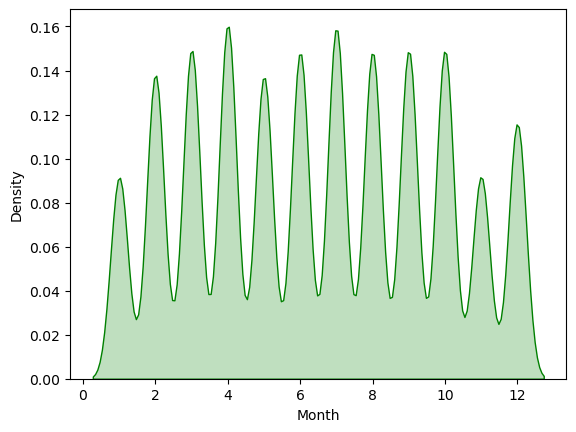

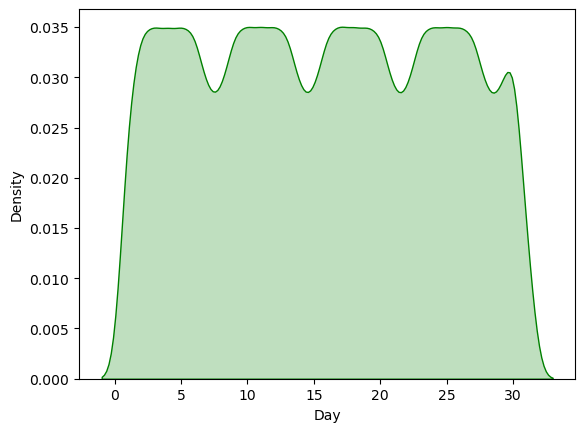

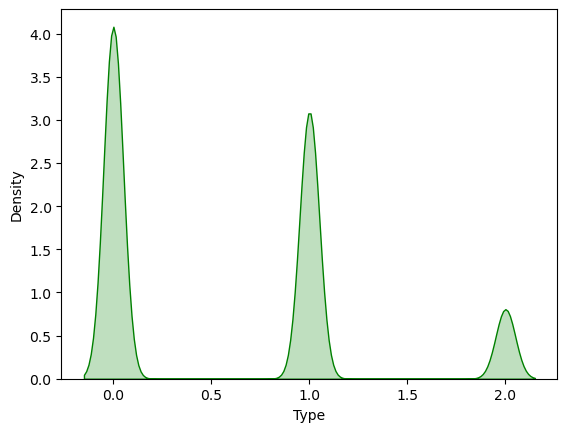

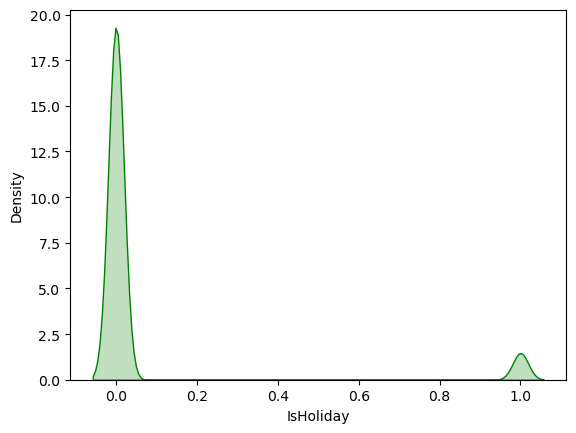

In [121]:
for i in data.columns:
    sns.kdeplot(data=data[i],fill=True,color="g")
    plt.show()

### SAVING THE PROCESSED FILE

In [124]:
# save final processed data
data.to_csv("final_data.csv")

In [126]:
da=data[data['Type']==1]

In [128]:
da.head(4)

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Type,IsHoliday
20482,3,1,6453.58,37392,45.71,2.572,5347.45,203.26,24.73,1481.31,3359.45,214.424881,7.368,2010,2,5,1,0
20483,3,1,12748.72,37392,47.93,2.548,5347.45,203.26,24.73,1481.31,3359.45,214.574792,7.368,2010,2,12,1,1
20484,3,1,8918.31,37392,47.07,2.514,5347.45,203.26,24.73,1481.31,3359.45,214.619887,7.368,2010,2,19,1,0
20485,3,1,4992.00,37392,52.05,2.561,5347.45,203.26,24.73,1481.31,3359.45,214.647513,7.368,2010,2,26,1,0


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   Size          421570 non-null  int64  
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     421570 non-null  float64
 7   MarkDown2     421570 non-null  float64
 8   MarkDown3     421570 non-null  float64
 9   MarkDown4     421570 non-null  float64
 10  MarkDown5     421570 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  Year          421570 non-null  int64  
 14  Month         421570 non-null  int64  
 15  Day           421570 non-null  int64  
 16  Type          421570 non-null  int32  
 17  IsHoliday     421570 non-null  int64  
dtypes: f

### HYPOTHESIS TESTING
#### T-TEST

In [134]:
### threshold for hypo test = 0.05
_, pvalue = stats.ttest_ind(data['Unemployment'],data['Fuel_Price'])
pvalue

0.0

In [136]:
_, pvalue = stats.ttest_ind(data['Unemployment'],data['CPI'])
pvalue

0.0

In [138]:
_, pvalue = stats.ttest_ind(data['Unemployment'],data['Year'])
pvalue

0.0

In [140]:
_, pvalue = stats.ttest_ind(data['MarkDown1'],data['Year'])
pvalue

0.0

In [142]:
_, pvalue = stats.ttest_ind(data['Type'],data['Size'])
pvalue

0.0

In [144]:
_, pvalue = stats.ttest_ind(data['MarkDown1'],data['MarkDown4'])
pvalue

0.0

In [146]:
_, pvalue = stats.ttest_ind(data['Year'],data['Fuel_Price'])
pvalue

0.0

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   Size          421570 non-null  int64  
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     421570 non-null  float64
 7   MarkDown2     421570 non-null  float64
 8   MarkDown3     421570 non-null  float64
 9   MarkDown4     421570 non-null  float64
 10  MarkDown5     421570 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  Year          421570 non-null  int64  
 14  Month         421570 non-null  int64  
 15  Day           421570 non-null  int64  
 16  Type          421570 non-null  int32  
 17  IsHoliday     421570 non-null  int64  
dtypes: f

### MODEL BUILDING

#### FEATURE IMPORTANCE

In [152]:
x=data.drop('Weekly_Sales',axis=1)
y=data['Weekly_Sales']

#### ORDINARY LEAST SQUARE

In [155]:
import statsmodels.api as sm

#creating a model by using independent and dependent variable through OLS method
model = sm.OLS(y,x)

In [157]:
#training the model
result = model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.391
Model:                            OLS   Adj. R-squared (uncentered):              0.391
Method:                 Least Squares   F-statistic:                          1.590e+04
Date:                Sun, 22 Sep 2024   Prob (F-statistic):                        0.00
Time:                        22:32:05   Log-Likelihood:                     -4.8072e+06
No. Observations:              421570   AIC:                                  9.614e+06
Df Residuals:                  421553   BIC:                                  9.615e+06
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [159]:
result.params

Store            -94.210347
Dept             111.604902
Size               0.102867
Temperature       19.371040
Fuel_Price      -408.671918
MarkDown1         -0.029580
MarkDown2          0.007496
MarkDown3          0.108763
MarkDown4          0.067034
MarkDown5          0.081625
CPI              -20.992077
Unemployment    -200.280590
Year               1.170056
Month            145.288899
Day              -18.189147
Type            1900.252388
IsHoliday        441.553840
dtype: float64

#### TRAIN-TEST SPLIT

In [162]:
# assign feature and target variable
X=data.drop('Weekly_Sales',axis=1)
y=data['Weekly_Sales']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [164]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(337256, 17) (84314, 17) (337256,) (84314,)


## MODEL CREATION

#### LINEAR REGRESSION

In [341]:
from sklearn.linear_model import LinearRegression

In [170]:
linear_model = LinearRegression(fit_intercept=True) #initialise

linear_model.fit(X_train,y_train) #fit - all magic

LinearRegression()

In [172]:
LinearRegression()

LinearRegression()

In [174]:
predicted_result = linear_model.predict(X_test)
print(predicted_result)

[ 8852.59861511 15025.85189947 20041.30718876 ... 22848.11068734
 12979.1055047  21608.49857874]


In [176]:
print(y_test)

394935        43.27
83180       2642.03
259789     41611.16
127139    169990.21
231371      5850.01
            ...    
62722       1509.50
242131     45710.06
380667     20211.89
418022      1352.15
13828       2866.43
Name: Weekly_Sales, Length: 84314, dtype: float64


In [178]:
linear_model.score(X_test, y_test)

0.08487960639322223

In [180]:
# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, predicted_result)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, predicted_result)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, predicted_result)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 14564.296053281372
Mean Squared Error (MSE)     : 476639605.9991988
Root Mean Square Error (RMSE): 21832.077454956016
R-squared (R2) Score         : 0.08487960639322223


#### DECISION TREE

In [183]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict

In [185]:
regressor = DecisionTreeRegressor(max_depth=5,random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [187]:
DecisionTreeRegressor(max_depth=5, random_state=0)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [189]:
pred=regressor.predict(X_train)
y_pred=regressor.predict(X_test)

In [191]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 9466.159329232107
Mean Squared Error: 234556600.0126818
Root Mean Squared Error: 15315.240775537348


In [193]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 9556.267705078622
Mean Squared Error: 244746271.969864
Root Mean Squared Error: 15644.368698348426


In [195]:
from sklearn.metrics import r2_score

print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.543463248023164
R-squared for Test: 0.5301013555738171


#### TUNING A DECISION TREE

In [198]:
# list of values to try
max_depth_range = range(5, 15)

# list to store the average RMSE for each value of max_depth
RMSE_Scores = []
MSE_Scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=345)

    MSE_scores = cross_val_score(treereg, X_train, y_train, scoring='neg_mean_squared_error')

    RMSE_Scores.append(np.mean(np.sqrt(-MSE_scores)))
    MSE_Scores.append(MSE_scores)

In [200]:
print (RMSE_Scores)

[15327.988615686667, 12364.438291155806, 11288.073316518075, 10288.695909463142, 9353.23596912764, 8326.685125932874, 7478.827461624413, 6781.669086646578, 6201.309348820581, 5791.899379848795]


Text(0, 0.5, 'RMSE (lower is better)')

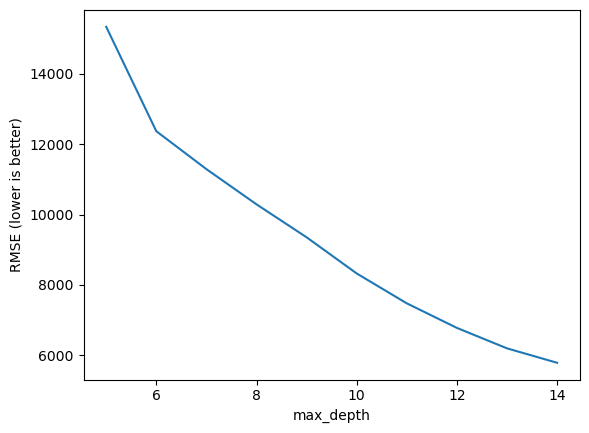

In [202]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_Scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

#### BUILDING FINAL DECISION TREE MODEL

In [205]:
# max_depth=11 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=14, random_state=345)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=14, random_state=345)

In [207]:
DecisionTreeRegressor(max_depth=14, random_state=345)


DecisionTreeRegressor(max_depth=14, random_state=345)

In [209]:
treereg.feature_importances_

array([5.93525387e-02, 6.53549313e-01, 1.86099153e-01, 6.29958219e-03,
       1.49193600e-03, 5.26641466e-04, 7.48137810e-04, 9.14628178e-03,
       6.08882533e-04, 2.99796988e-04, 2.42761464e-02, 7.73418023e-03,
       1.80294881e-04, 2.25534390e-02, 1.14969636e-02, 1.40579740e-02,
       1.57873855e-03])

In [211]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':data.columns.difference(['Weekly_Sales']), 'importance':treereg.feature_importances_})

,feature,importance
0,CPI,0.059353
1,Day,0.653549
2,Dept,0.186099
3,Fuel_Price,0.006300
4,IsHoliday,0.001492
5,MarkDown1,0.000527
6,MarkDown2,0.000748
7,MarkDown3,0.009146
8,MarkDown4,0.000609
9,MarkDown5,0.000300


In [213]:
# create a Graphviz file
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_vehicles.png', feature_names=data.columns.difference(['Weekly_Sales']))

#### MAKING PREDICTIONS

In [216]:
pred=treereg.predict(X_train)
y_pred=treereg.predict(X_test)

In [218]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 2171.435228816207
Mean Squared Error: 19711294.548681486
Root Mean Squared Error: 4439.740369512781


In [220]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 2515.5157968612784
Mean Squared Error: 30855183.97525836
Root Mean Squared Error: 5554.7442763153695


In [222]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.9616342904440668
R-squared for Test: 0.9407598366798426


#### RANDOM FOREST

In [225]:
from sklearn.ensemble import RandomForestRegressor

In [227]:
rfr = RandomForestRegressor(max_depth=5,n_estimators=20, random_state=0)
rfr.fit(X_train, y_train)
pred = rfr.predict(X_train)

In [229]:
y_pred= rfr.predict(X_test)
y_pred

array([ 5085.44839035, 12104.75138096, 12104.75138096, ...,
       19625.69729559,  5652.21081491, 12104.75138096])

In [231]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 9087.740471505385
Mean Squared Error: 215259803.9409553
Root Mean Squared Error: 14671.734864730732


In [233]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 9174.219730345345
Mean Squared Error: 225071114.45562023
Root Mean Squared Error: 15002.370294577462


In [235]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.5810221851908628
R-squared for Test: 0.5678765166432906


#### TUNING A RANDOM FOREST

In [238]:
from sklearn.model_selection import GridSearchCV

In [240]:
param_grid={'max_depth': range(8,15),
            'n_estimators': (10, 50)}

In [242]:
# Perform Grid-Search
gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)

In [244]:
grid_result.best_score_

0.9529206456069913

In [246]:
grid_result.best_params_

{'max_depth': 14, 'n_estimators': 50}

#### FINAL RANDOM FOREST

In [249]:
rfr = RandomForestRegressor(max_depth=14,n_estimators=50, random_state=0)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, n_estimators=50, random_state=0)

In [251]:
RandomForestRegressor(max_depth=14, n_estimators=50, random_state=0)


RandomForestRegressor(max_depth=14, n_estimators=50, random_state=0)

In [253]:
pred = rfr.predict(X_train)
y_pred = rfr.predict(X_test)

In [255]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 2021.0082085246422
Mean Squared Error: 16455443.906193608
Root Mean Squared Error: 4056.5310187638906


In [257]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 2252.7981915846453
Mean Squared Error: 23692414.593568917
Root Mean Squared Error: 4867.485448726983


In [259]:
from sklearn.metrics import r2_score

print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.9679714196366059
R-squared for Test: 0.9545119383797112


#### GRADIENT BOOSTING

In [262]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit

In [264]:
gbrt=GradientBoostingRegressor()
gbrt.fit(X_train, y_train)

GradientBoostingRegressor()

In [266]:
GradientBoostingRegressor()


GradientBoostingRegressor()

In [268]:
pred=gbrt.predict(X_train)
y_pred=gbrt.predict(X_test)

In [270]:
#One of the benefits of growing trees is that we can understand how important each of the features are
print(gbrt.feature_importances_)

[2.69657263e-02 7.39211350e-01 2.05832570e-01 4.23153761e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.14368486e-03
 6.19726732e-05 2.04500423e-05 9.98913990e-03 4.86621887e-04
 0.00000000e+00 3.37911178e-03 1.11742075e-03 4.29069328e-03
 7.81052804e-05]


In [272]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 6910.761671282377
Mean Squared Error: 132764851.16457222
Root Mean Squared Error: 11522.36308942624


In [274]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 6956.130654863708
Mean Squared Error: 138378036.80223298
Root Mean Squared Error: 11763.419434936126


In [276]:
from sklearn.metrics import r2_score

print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.7415888790846868
R-squared for Test: 0.7343221966636035


#### TUNING THE GRADIENT BOOSTING MODEL

In [279]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [281]:
param_grid={'learning_rate' : [0.1,0.01],# 0.02,0.05,0.1],
            'max_depth' : [4,6]}# 5,6]

In [283]:
# Perform Grid-Search
gbr = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=param_grid)

grid_result = gbr.fit(X_train, y_train)

In [285]:
grid_result.best_score_

0.9035880337774638

In [287]:
grid_result.best_params_

{'learning_rate': 0.1, 'max_depth': 6}

#### FINAL GRADIENT BOOST 

In [290]:
gbrt=GradientBoostingRegressor(learning_rate=0.01, max_depth=6)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=6)

In [292]:
GradientBoostingRegressor(learning_rate=0.01, max_depth=6)


GradientBoostingRegressor(learning_rate=0.01, max_depth=6)

In [294]:
pred=gbrt.predict(X_train)
y_pred=gbrt.predict(X_test)

In [296]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 9016.409901337167
Mean Squared Error: 194296736.36029223
Root Mean Squared Error: 13939.036421513943


In [298]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 9069.2631470758
Mean Squared Error: 201631713.32167524
Root Mean Squared Error: 14199.70821255406


In [300]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.6218243232855887
R-squared for Test: 0.6128788070984379


#### XG BOOST

In [303]:
import xgboost as xgb
import warnings

In [305]:
warnings.filterwarnings("ignore", category=FutureWarning)
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [307]:
pred=xg_reg.predict(X_train)
y_pred=xg_reg.predict(X_test)

In [309]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 2986.819287708257
Mean Squared Error: 27556757.344624504
Root Mean Squared Error: 5249.453051949747


In [311]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 3054.0468201632925
Mean Squared Error: 30228059.917823825
Root Mean Squared Error: 5498.005085285374


In [313]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.9463640226177883
R-squared for Test: 0.941963878490587


#### TUNING XG BOOST

In [316]:
xgb1 = xgb.XGBRegressor(objective='reg:squarederror')

In [318]:
parameters = {'learning_rate': [0.01,0.1], #so called `eta` value
              'max_depth': [4,5,6]}

In [320]:
xgb_grid = GridSearchCV(xgb1,parameters,n_jobs = 5,verbose=True)

grid_result = xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [322]:
print(xgb_grid.best_score_)

0.9032729206719653


In [324]:
print(xgb_grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 6}


#### BUILDING XG BOOST MODEL

In [327]:
xg_reg = xgb.XGBRegressor(learning_rate=0.1, max_depth=9,objective='reg:squarederror')
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [329]:
pred=xg_reg.predict(X_train)
y_pred=xg_reg.predict(X_test)

In [331]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 2161.8338139764387
Mean Squared Error: 14605449.77648095
Root Mean Squared Error: 3821.707704218227


In [333]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 2299.6257864304857
Mean Squared Error: 18969329.32452913
Root Mean Squared Error: 4355.379354835711


In [335]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.9715722149717599
R-squared for Test: 0.9635799881096141


### NEURAL NETWORKS

In [362]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
import warnings

In [364]:
warnings.filterwarnings("ignore", category=FutureWarning)  # Ignore FutureWarning
reg1 = GradientBoostingRegressor(learning_rate=0.01, max_depth=6)
reg2 = RandomForestRegressor(max_depth=14,n_estimators=50, random_state=0)
reg3 = xgb.XGBRegressor(learning_rate=0.1, max_depth=4,objective='reg:squarederror')
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('xg', reg3)])
ereg = ereg.fit(X_train, y_train)

In [366]:
pred= ereg.predict(X_train)
y_pred= ereg.predict(X_test)

In [368]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 5049.74710245848
Mean Squared Error: 69630607.26383889
Root Mean Squared Error: 8344.495626689422


In [370]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 5113.892132052376
Mean Squared Error: 75987420.67679532
Root Mean Squared Error: 8717.076383558613


### COMPARING THE MODELS ACCURACY

In [373]:
# - Linear Regressor Accuracy        -     84.879606
# - Random Forest Regressor Accuracy -     95.451193
# - Decision Tree Regressor Accuracy -     94.075983
# - K Neighbors Regressor Accuracy   -     91.972603
# - XGBoost Accuracy                 -     94.211523 
# - DNN Accuracy                     -     90.503287

#### SAVING THE BEST MODEL

In [376]:
import pickle
# Saving model to disk of random forest
pickle.dump(rfr, open('model.pkl','wb'))

#### MODEL LOADING & PREDICTION

In [378]:
import pickle
model=pickle.load(open('model.pkl', 'rb'))
model.predict([[1,1	,151315,	10.00	,2.548	,211.242170	,8.106	,132.59, 125, 52, 0, 0	,2012	,12,	2,	2	,0]])

C:\Users\ruaru\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([48272.1436503])

In [380]:
import numpy as np
import pickle
model=pickle.load(open('model.pkl', 'rb'))
x=np.array([[1, 1	,151315,	10.00	,3.548	,211.242170	,8.106	,140.59, 150, 85, 75, 0	,2012	,12,	2,	2	,1]])
model.predict(x)

C:\Users\ruaru\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([41633.47158102])